In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("titanic-1.csv")
df

,Name,Sex,Age,Survived,Pclass,Fare,SibSp,Parch
0,John Smith,male,22,0,3,7.2500,1,0
1,Mary Brown,female,38,1,1,71.2833,1,0
2,James Wilson,male,35,1,3,8.0500,0,0
3,Lucy Black,female,28,1,1,53.1000,0,1
4,Edward Green,male,40,0,2,13.0000,0,0


In [ ]:
# Raggruppa il DataFrame df per le colonne "Pclass" e "Sex"
report = df.groupby(["Pclass", "Sex"]).agg(
    Sopravvissuti = ("Survived", "sum"), # Calcola la somma della colonna "Survived" per ogni gruppo e la assegna alla colonna "Sopravvissuti" 
    Tariffa_Media = ("Fare", "mean") # Calcola la media della colonna "Fare" per ogni gruppo e la assegna alla colonna "Tariffa_Media"
).reset_index()  # Reimposta l'indice per ottenere un DataFrame ordinario
report  # Visualizza il DataFrame risultante

,Pclass,Sex,Sopravvissuti,Tariffa_Media
0,1,female,2,62.19165
1,2,male,0,13.00000
2,3,male,1,7.65000


In [25]:
report = report.sort_values(by=["Pclass","Sex"])
report

,Pclass,Sex,Sopravvissuti,Tariffa_Media
0,1,female,2,62.19165
1,2,male,0,13.00000
2,3,male,1,7.65000


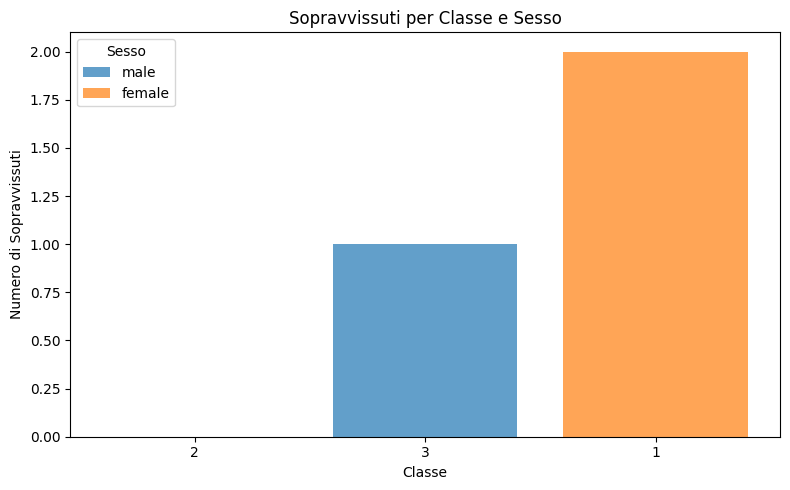

In [33]:
plt.figure(figsize=(8, 5))  # Imposta la dimensione della figura
# Cicla sui due possibili valori di "Sex"
for sex in ["male", "female"]: # Seleziona dal DataFrame report solo le righe corrispondenti al sesso corrente
    subset = report[report["Sex"] == sex] # Crea un grafico a barre per il numero di sopravvissuti per ogni classe, separato per sesso
    plt.bar(subset["Pclass"].astype(str), subset["Sopravvissuti"], label=sex, alpha=0.7)

plt.title("Sopravvissuti per Classe e Sesso")
plt.xlabel("Classe")
plt.ylabel("Numero di Sopravvissuti")
plt.legend(title="Sesso")
plt.tight_layout()